In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
now = datetime.now()
now

datetime.datetime(2017, 9, 25, 12, 3, 57, 900000)

In [3]:
now.year,now.month,now.day

(2017, 9, 25)

In [4]:
now.strftime('%Y-%m-%d')

'2017-09-25'

In [9]:
value = '2017-09-25'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2017, 9, 25, 0, 0)

%H 24 hour
%M min
%S second

In [10]:
dates = [datetime(2017,9,1), datetime(2017,9,2)]
ts = pd.Series(np.random.randn(2), index=dates)
ts

2017-09-01   -1.430770
2017-09-02   -2.179682
dtype: float64

In [11]:
type(ts),ts.index

(pandas.core.series.Series,
 DatetimeIndex(['2017-09-01', '2017-09-02'], dtype='datetime64[ns]', freq=None))

In [13]:
stamp = ts.index[0]
stamp

Timestamp('2017-09-01 00:00:00')

In [14]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('2011-1-1', periods=1000))
longer_ts.head()

2011-01-01    0.844427
2011-01-02   -0.822978
2011-01-03    0.266220
2011-01-04   -2.669071
2011-01-05    0.434399
Freq: D, dtype: float64

In [17]:
dates = pd.date_range('2017-1-1', periods=100, freq='W-WED')
dates[0:5]#周三，每个一周选一次

DatetimeIndex(['2017-01-04', '2017-01-11', '2017-01-18', '2017-01-25',
               '2017-02-01'],
              dtype='datetime64[ns]', freq='W-WED')

In [24]:
ts = pd.Series(np.random.randn(2), index=dates[0:2])
ts.resample('D').mean()
#10-5 resample参数说明

2017-01-04    1.557092
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11   -0.434433
Freq: D, dtype: float64

10-4 时间频率
D day
H hour
T min
S second

In [22]:
ts = pd.Series(np.random.randn(4), index=pd.date_range('2017-1-1', periods=4, freq='M'))
ts,ts.shift(2),ts.shift(-2)

(2017-01-31   -0.392613
 2017-02-28    1.100915
 2017-03-31   -0.694312
 2017-04-30    1.472772
 Freq: M, dtype: float64, 2017-01-31         NaN
 2017-02-28         NaN
 2017-03-31   -0.392613
 2017-04-30    1.100915
 Freq: M, dtype: float64, 2017-01-31   -0.694312
 2017-02-28    1.472772
 2017-03-31         NaN
 2017-04-30         NaN
 Freq: M, dtype: float64)

In [25]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [26]:
%matplotlib inline

In [27]:
close_px_all = pd.read_csv('d:/project/ml/python/pydata-book-master/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT','XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  app.launch_new_instance()


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


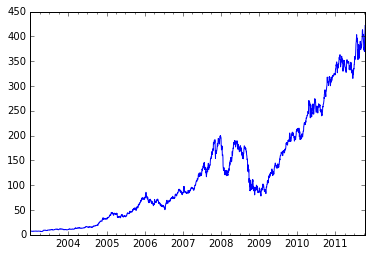

In [28]:
close_px['AAPL'].plot()

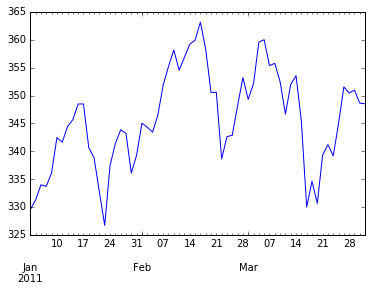

In [30]:
close_px['AAPL'].loc['2011-1':'2011-03'].plot()

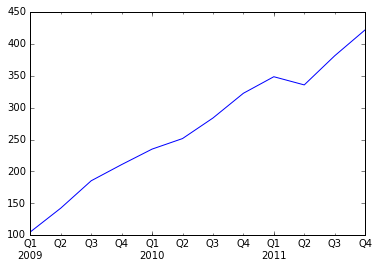

In [31]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill().loc['2009':].plot()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  if __name__ == '__main__':


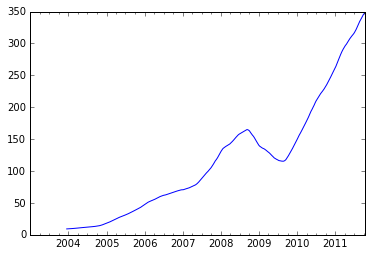

In [32]:
pd.rolling_mean(close_px.AAPL, 250).plot()

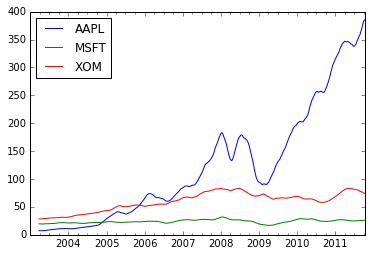

In [35]:
close_px.rolling(window=60).mean().plot()
# moving windows 10-6

In [36]:
spx_px = close_px_all['SPX']
spx_px.head()

2003-01-02    909.03
2003-01-03    908.59
2003-01-06    929.01
2003-01-07    922.93
2003-01-08    909.93
Name: SPX, dtype: float64

In [38]:
spx_rets = spx_px/spx_px.shift(1)-1
spx_rets.head()

2003-01-02         NaN
2003-01-03   -0.000484
2003-01-06    0.022474
2003-01-07   -0.006545
2003-01-08   -0.014086
Name: SPX, dtype: float64

In [39]:
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  from ipykernel import kernelapp as app


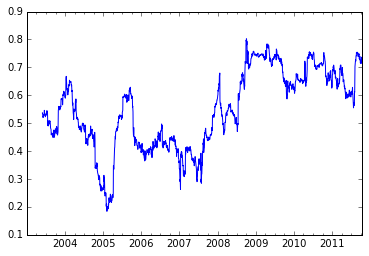

In [40]:
corr.plot()